In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv('heart.csv')
data.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [9]:
X = data.drop('target', axis=1)
y = data['target']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


In [11]:
model = RandomForestClassifier(n_estimators=100, random_state=42) #max_depth, min_samples_split, min_samples_leaf

model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
y_pred = model.predict(X_test)

In [13]:
print('Accuracy:',accuracy_score(y_test, y_pred))

Accuracy: 0.8360655737704918


In [14]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
print('DT Accuracy:', dt.score(X_test, y_test))

DT Accuracy: 0.7540983606557377


age         0.092811
sex         0.035658
cp          0.103792
trestbps    0.077537
chol        0.074812
fbs         0.011698
restecg     0.019782
thalach     0.119725
exang       0.075809
oldpeak     0.128485
slope       0.051058
ca          0.115533
thal        0.093300
dtype: float64


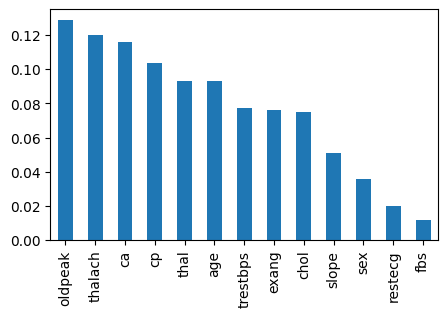

In [15]:
import matplotlib.pyplot as plt
importances = pd.Series(model.feature_importances_, index=X.columns)
print(importances)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(5,3))
plt.show()

The average (or majority vote) smooths out errors. This is called ensemble learning

Every tree trains on a random sample (about 2/3 of the data). The remaining 1/3 is left out - that is Out Of Bag data.
Each tree can then test itself on the data it didn't see.
When you average those results across all trees, you get the OOB score, a good estimate of accuracy.

In [16]:
data.shape

(303, 14)

In [17]:
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf.fit(X_train,y_train)
print('OOB Score:', rf.oob_score_)

OOB Score: 0.8347107438016529


In [19]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':[50,100,200], 'max_depth':[4,6,8,None]}
grid = GridSearchCV(rf, param_grid, cv=3)
grid.fit(X_train, y_train)
grid.best_params_


{'max_depth': 4, 'n_estimators': 200}